The pre-trained resnet18 weights are obtained from [here](https://github.com/qubvel/classification_models).

*   The model is further trained for 5 epochs to get accuracy of 70%

Misclassified images are obtained in the following way:

* The `y_test` array contains the true labels as one-hot encoded vector.
* The predictions made by the model(here it is named as `predicted`) is an array with same shape(10,000 X 10 --> 10,000 images and 10 classes) and dimensions(2) as the `y_test`.
* Ideally(for 100% accuracy), `predicted`= `y_test` or `predicted - y_test = [[0 . . . 0]...
[0 . . . 0]]`. 
 But as accuracy is not 100%, there is some difference between the two.
* Each row of the array represents the image and the value in each column represents the confidence level of the model that the image(represented by that specific row vector) belongs to the class represented by that column.
* The model's predicted output for any image(row of the array) is the class(column of the array) with highest confidence value.
* So to obtain the the misclassified images the _absolute_ differences between `y_test` and `predicted` is calculated and stored in the array named `results`.
* Images(row vectors) with least differences are predicted accurately and those with high differences are the misclassified images.
* To identify misclassified(top 50) images the `results` array is summed along the row and the sum is stored in the array named `error_sum` . The larger the value of this sum the greater is the misclassification.
* Now the `indices` corresponding to 50 largest values in `error_sum` are obtained and stored in the array -`error_top50` and then these values are used for plotting the misclassified images.




In [1]:

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.models import load_model
from keras.regularizers import l2
import os
import math

In [4]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-zk1ne_zp
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-zk1ne_zp
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-g46_ey3g/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import decode_predictions

In [0]:
from classification_models.resnet import ResNet18, preprocess_input

# model = ResNet18((224, 224, 3), weights='imagenet')

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
batch_size = 64
num_classes = 10
epochs = 5

In [0]:
# convert to one hot encoing
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = preprocess_input(x_train)

In [11]:
# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

W0701 06:25:06.379054 140002510108544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 06:25:06.417221 140002510108544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 06:25:06.418782 140002510108544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0701 06:25:06.421230 140002510108544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0701 06:25:06.422960 140002

In [12]:
y_test.shape

(10000, 10)

In [13]:
# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


W0701 06:25:14.283897 140002510108544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.fit(x_train, y_train, batch_size = 512)

In [14]:
print('shape ',x_train.shape)
print('ndim', x_train.ndim)
print('size', x_train.size)

shape  (50000, 32, 32, 3)
ndim 4
size 153600000


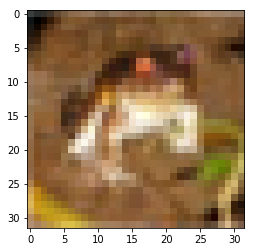

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

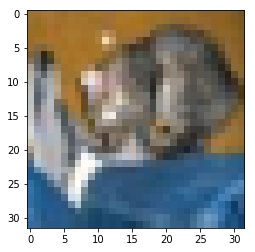

In [16]:
plt.imshow(x_test[0])

In [0]:
model.fit(x_train, y_train, batch_size = 512,epochs= 5, initial_epoch = 1)

Epoch 2/5
50000/50000 [==============================] - 9s 183us/step - loss: 1.0349 - acc: 0.6410
Epoch 3/5
50000/50000 [==============================] - 9s 184us/step - loss: 0.8633 - acc: 0.7009
Epoch 4/5
50000/50000 [==============================] - 9s 185us/step - loss: 0.7502 - acc: 0.7412
Epoch 5/5
50000/50000 [==============================] - 9s 186us/step - loss: 0.6634 - acc: 0.7715


In [0]:
model.load_weights('/content/drive/My Drive/EIP 3.2/CIFAR10_weights.h5')

In [0]:
predicted = model.predict(x_test)

In [19]:
print(predicted.size)
print(predicted.ndim)
print(predicted.shape)


100000
2
(10000, 10)


In [20]:
score = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 6s 602us/step


In [0]:
score

[0.8608828893661499, 0.7048]

In [21]:
score

[0.8608828495979309, 0.7048]

In [0]:
result = np.absolute(y_test - predicted) # difference between true labels and predicted

In [23]:
print('Vector for actual class', y_test[0])
print('Vector for predicted class\n',predicted[0])
print('Differences between the vectors of predicted and actual\n',result[0])
print('Actual Class', np.where(y_test[0] == y_test[0].max()))
print('Predicted Class', np.where(predicted[0] == predicted[0].max()))


Vector for actual class [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Vector for predicted class
 [0.00441594 0.6224902  0.00388046 0.2649783  0.02030866 0.05137305
 0.02272028 0.00103798 0.00170954 0.00708554]
Differences between the vectors of predicted and actual
 [0.00441594 0.6224902  0.00388046 0.7350217  0.02030866 0.05137305
 0.02272028 0.00103798 0.00170954 0.00708554]
Actual Class (array([3]),)
Predicted Class (array([1]),)


In [25]:
result[0] # Check any random diffrence

array([0.00441594, 0.6224902 , 0.00388046, 0.7350217 , 0.02030866,
       0.05137305, 0.02272028, 0.00103798, 0.00170954, 0.00708554],
      dtype=float32)

In [0]:
error_sum = result.sum(axis = 1) # Sum of error_sum along row . This is done in order to find the images with very large differences  
err = error_sum.reshape((10000, 1)).copy()

In [0]:
error_top50 =  np.argsort(error_sum)[-50:] # get 50 images having large difference between predicted and actual

In [28]:
print(error_top50) # These are the indices of the top 50 test images(out of 10000) that are misclassified

[7707 8389 8996 7119 5340 7406 5838 7827 8443 9385 6839 2251 7117 1438
 3264 2034 9484 7657 7040 1572 1506 1823 6607 7041 3075 4942 7224 2719
 1884   35 2453 2525 7536 8333 7351 4309 8385 5562 2810 7100 3400 9349
 1049 5088 5910 1100 4590 3171  853  982]


In [29]:
print(error_sum[error_top50[0]])

1.9959989


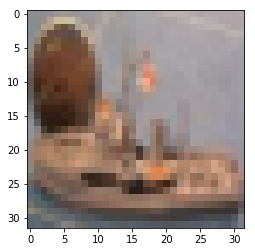

In [30]:
plt.imshow(x_test[error_top50[0]].reshape((32, 32, 3))) # Plot of a misclassified image

In [31]:
print(y_test[error_top50[0]]) # actual class
print(np.where(predicted == np.amax(predicted[error_top50[0]]))) # class predicted

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(array([7707]), array([6]))


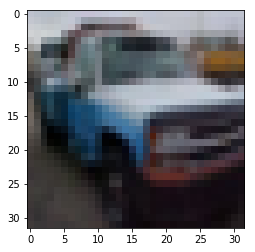

In [32]:
plt.imshow(x_test[error_top50[48]].reshape((32, 32, 3))) # Plot of a misclassified image

In [0]:
model.save_weights('my_model_weights.h5')

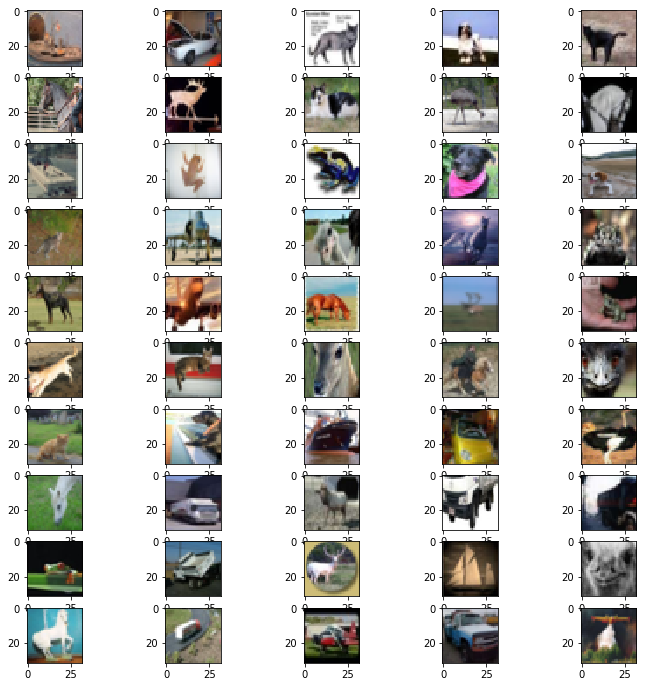

In [34]:
# Plot of Top-50 misclassified images
fig, ax = plt.subplots(10, 5, figsize=(12, 12)) # Generate figure with axes.Figure size (12, 12) is chosen to fit the screen size!
for i, axi in enumerate(ax.flat):
  axi.imshow(x_test[error_top50[i]])
  # axi.set(xticks=[], yticks=[])
  

In [78]:
for idx,i in enumerate(error_top50):
  print(idx + 1, '. Actual class = ', np.where(y_test[i] == 1.),sep = '') # actual class
  print('  Predicted class = ',np.where(predicted[i] == predicted[i].max())) # class predicted
  print('\n')

1. Actual class = (array([8]),)
  Predicted class =  (array([6]),)


2. Actual class = (array([1]),)
  Predicted class =  (array([2]),)


3. Actual class = (array([3]),)
  Predicted class =  (array([7]),)


4. Actual class = (array([5]),)
  Predicted class =  (array([0]),)


5. Actual class = (array([3]),)
  Predicted class =  (array([4]),)


6. Actual class = (array([7]),)
  Predicted class =  (array([8]),)


7. Actual class = (array([4]),)
  Predicted class =  (array([7]),)


8. Actual class = (array([3]),)
  Predicted class =  (array([5]),)


9. Actual class = (array([2]),)
  Predicted class =  (array([7]),)


10. Actual class = (array([7]),)
  Predicted class =  (array([8]),)


11. Actual class = (array([8]),)
  Predicted class =  (array([4]),)


12. Actual class = (array([6]),)
  Predicted class =  (array([3]),)


13. Actual class = (array([6]),)
  Predicted class =  (array([5]),)


14. Actual class = (array([5]),)
  Predicted class =  (array([2]),)


15. Actual class = (array([5]

In [0]:
fig.savefig('/content/drive/My Drive/EIP 3.2/Top50_misclassified.png')

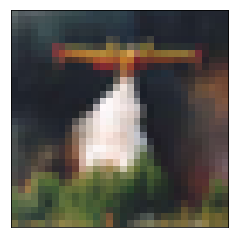

In [74]:
# Save misclassified images in drive
for i in error_top50:
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i])
  plt.savefig("/content/drive/My Drive/EIP 3.2/Misclassified50/Misclassified_top50/misclassified_{0}.png".format(i))

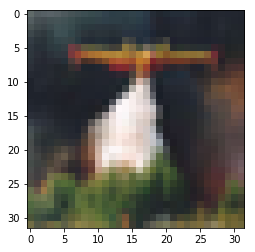

In [75]:
#save images with axes
for i in error_top50:
  plt.imshow(x_test[i].reshape(32, 32, 3))
  plt.savefig("/content/drive/My Drive/EIP 3.2/Misclassified50/misclassified_{0}.png".format(i))
  # plt.savefig("/content/drive/My Drive/EIP 3.2/Misclassified50/Misclassified_top50/misclassified_{0}.png".format(i))

In [36]:
# indices of 50 test images with least errors(i.e, these images are classified correctly)
error_bottom50 = np.argsort(error_sum)[:50]
error_bottom50

array([2665,  765, 8772, 1872, 6794, 7937, 6701, 1784, 4372, 6585, 6159,
       4633, 6119, 4658, 9788, 6352, 7060, 7033, 9572, 5054, 3855, 3691,
        540, 3289, 2308, 6058, 6410, 5692, 2445, 1614, 9323, 2052, 4773,
       6555, 1055, 3471, 8067,  871, 2636,  546, 4035, 3466,  442, 4232,
       3182, 7555, 3268,  353, 2520, 2235])

In [37]:
# Actual vs Predicted for images with least error

for idx,i in enumerate(error_bottom50):
  print(idx + 1, '. Actual class = ', np.where(y_test[i] == 1.),sep = '') # actual class
  print('  Predicted class = ',np.where(predicted[i] == predicted[i].max())) # class predicted
  print('\n')

1. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


2. Actual class = (array([2]),)
  Predicted class =  (array([2]),)


3. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


4. Actual class = (array([5]),)
  Predicted class =  (array([5]),)


5. Actual class = (array([8]),)
  Predicted class =  (array([8]),)


6. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


7. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


8. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


9. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


10. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


11. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


12. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


13. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


14. Actual class = (array([1]),)
  Predicted class =  (array([1]),)


15. Actual class = (array([1]